<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Classification With Neural Networks***

###**Tenggat Waktu: 4 Desember 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **4 Desember 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


**Catatan:**
Harap jangan menunda - nunda mengerjakan karena Tutorial 7 kali ini cukup banyak pertanyaan yang harus dijawab.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["""
https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://scikit-learn.org/stable/modules/neural_networks_supervised.html
https://stats.stackexchange.com/questions/477430/what-is-the-difference-of-max-iter-definition-for-lbfgs-and-sgd-adam-optim
https://jtiik.ub.ac.id/index.php/jtiik/article/view/1352/pdf
"""]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


# Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

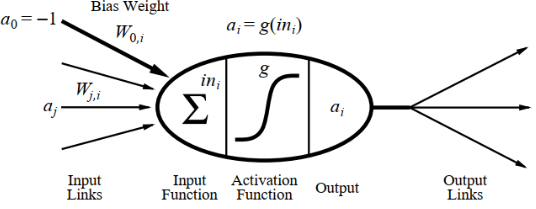

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

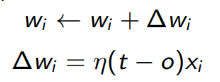

Penjelasan variabel pada rumus:
- wi merupakan weight untuk input ke-i
- xi merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

# Klasifikasi dengan Neural Network

## Eksplorasi Dataset

Pada tutorial ini, dataset yang digunakan adalah dataset Iris. Dataset Iris adalah dataset multivariat yang diperkenalkan oleh Ronald Fisher pada tahun 1936 melalui penelitiannya yang berjudul "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***". 
  
Dataset ini berisi informasi tentang komponen bunga serta spesiesnya. Dataset ini berisi 50 baris sampel dari setiap spesies. Total terdapat 3 buah spesies dengan masing - masing berjumlah 50 baris data. Dataset ini berisi kolom sebagai berikut:

1.  **sepal_length** (Dalam unit centimeter, float)
2.  **sepal_width** (Dalam unit centimeter, float)
3.  **petal_length** (Dalam unit centimeter, float)
4.  **petal_width** (Dalam unit centimeter, float)
5.  **species** (3 Kelas, string)

Mari kita lihat apa saja informasi yang bisa kita dapatkan dari dataset ini!

In [3]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

Dataset yang digunakan diambil dari UCI machine learning. Pastikan laptop Anda terhubung dengan internet. Kemudian, karena dataset ini tidak memiliki header, maka header harus ditambahkan secara manual

In [4]:
#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("iris.data", header = None, names= colnames )
# "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Seperti yang terlihat pada output dari cell di atas, terlihat bahwa dataset memiliki 3 buath kelas yang masing - masing berjumlah sama. Sehingga bisa dikatakan dataset ini  tidak memiliki ketimpangan data

Setelah mendapatkan informasi terkait jumlah species, saatnya melakukan eksplorasi lebih jauh

In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


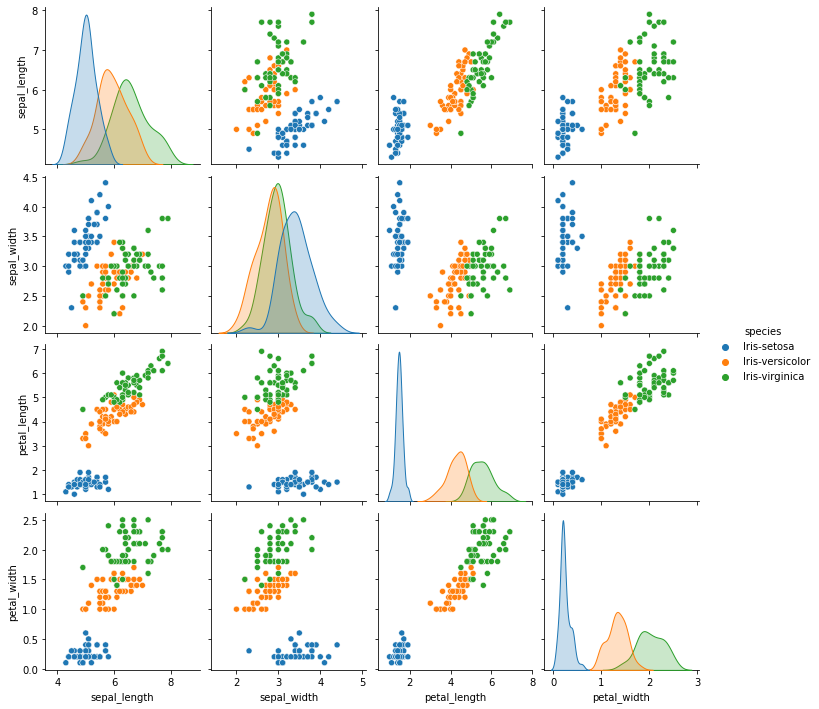

In [7]:
# Visualisasi dengan Pair Plotting

sns.pairplot(data=dataset, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species')

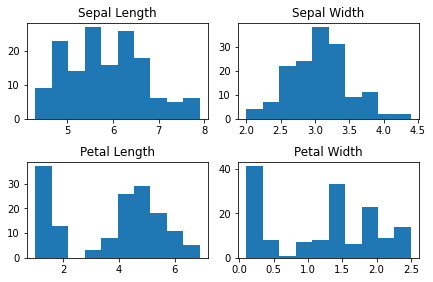

In [8]:
# Visualisasi dengan Bar Chart

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(dataset['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(dataset['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(dataset['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(dataset['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

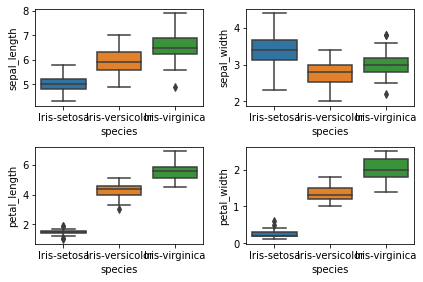

In [9]:
# Visualisasi dengan Boxplot

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

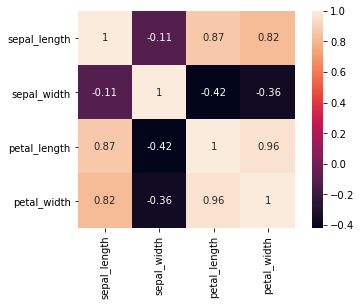

In [10]:
# Visualisasi Menggunakan Heatmap
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

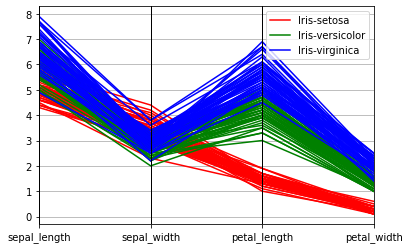

In [11]:
# Visualisasi Menggunakan Parallel Coordinate
parallel_coordinates(dataset, "species", color = ['red', 'green', 'blue']);

Setelah eksplorasi data selesai, sekarang saatnya membuat Classifier untuk Neural Network yang kita gunakan untuk dataset iris ini. Pembentukan classifier dilakukan pada section berikutnya

## Preprocessing Data

Pada bagian ini akan dilakukan preprocessing data pada dataset iris. Preprocessing melibatkan:
- Normalisasi Dataset
- Variable Encoding
- Pemisahan data menjadi X_train, X_test, y_train, dan y_test

Hal ini diperlukan agar Neural Network dapat menerima data dengan format yang sesuai ekspektasi algoritma tersebut,

### Pertanyaan A.1
Berdasarkan dataframe yang digunakan, silakan Anda lakukan normalisasi dataframe tersebut
menggunakan jenis normalisasi Min-Max. Normalisasi dilakukan untuk semua kolom, kecuali kolom species.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Jawaban A.1
# TODO: Tuliskan kode disini (Ganti None dengan jawaban)

X = dataset.drop(columns="species", axis=1)
y = dataset[["species"]]
scaler = MinMaxScaler()

dataset_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) 
dataset_norm

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [14]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


### Pertanyaan A.2
Silakan lakukan penggantian informasi species pada data sehingga yang awalnya berupa string menjadi bentuk integer.
Ikuti aturan konversi berikut:

Iris-setosa -> 1  
Iris-versicolor -> 2  
Iris-virginica -> 3

Kemudian tampilkan 10 baris data pertama

In [15]:
dataset.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
 dataset_norm["species"] = dataset.species.map({
    "Iris-setosa": 1,
    "Iris-versicolor": 2,
    "Iris-virginica": 3,
})

In [17]:
# Jawaban A.2
# TODO: Tuliskan kode disini

dataset_norm.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
5,0.305556,0.791667,0.118644,0.125000,1
6,0.083333,0.583333,0.067797,0.083333,1
7,0.194444,0.583333,0.084746,0.041667,1
8,0.027778,0.375000,0.067797,0.041667,1
9,0.166667,0.458333,0.084746,0.000000,1


In [18]:
dataset = dataset_norm

Berikut ini adalah ekspektasi Jawaban Pertanyaan A.1 dan A.2 sebelum melanjutkan ke tahap selanjutnya. Harap periksa kembali sebelum melanjutkan agar tidak terjadi kesalahan di tahap berikutnya
  

<img src="https://i.ibb.co/Cmwr5fT/Screen-Shot-2021-11-24-at-13-06-25.png" alt="Fasilkom UI" width="500"/>

In [19]:
from sklearn.model_selection import train_test_split

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

## Klasifikasi dengan Neural Network

Pada bagian ini kita akan melakukanklasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn. Pada kasus klasifikasi, kasus utama yang akan kita selesaikan adalah:
  

**Prediksi jenis species pada dataset Iris**
  

Catatan: Neural network membutuhkan data yang seluruhnya berisi data numerik, kemudian karena dataset yang kita gunakan tidak semuanya berisi data numerik, maka perlu dilakukan penyesuaian. **Jadi harap selesaikan terlebih dulu pertanyaan A.1 & A.2 sebelum melanjutkan ke tahap ini**

### Pembentukan Classifier & Training

Seperti pada classifier yang telah dipelajari sebelumnya (SVM, dan lainnya), MLPClassifier juga memiliki konfigurasi berupa hyperparameter yang bisa dikustomisasi sesuai kebutuhan.

Informasi lebih lanjut terkait parameter, bisa dilihat disini:  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [20]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [21]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              solver='lbfgs', verbose=True)

### Evaluasi
Evaluasi menggunakan beberapa metrik evaluasi untuk mengetahui seberapa baik performa yang didapatkan.  
  
Mencari tahu bagaimana hasil prediksi yang dihasilkan oleh MLPClassifier.
Hasil yang dikembalikan adalah berupa array yang berisi angka dengan rentang [1,3], dimana setiap angka merepresentasikan berikut:  

*   1 -> Iris-setosa
*   2 -> Iris-versicolor
*   3 -> Iris-virginica

Prediksi menggunakan dataframe yang digunakan untuk testing yang secara keseluruhan berjumlah 30% dari data

In [22]:
print("Hasil Prediksi MLPClassifier:")
y_pred = classifier.predict(X_test)
print(y_pred)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 2 2 2 3 1 1 2 2 1 3 2 3 3
 1 3 2 3 3 1 2 3]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


#### Fungsi Evaluasi (Klasifikasi)
Fungsi ini dapat digunakan kembali jika Anda memerlukannya untuk menjawab pertanyaan atau bereksperimen.

In [23]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
    

def evaluate_classifier_performance(y_pred, y_test, classifier):
    # Informasi evaluasi secara compact
    
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, y_pred)))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_).plot()

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.93      0.88      0.90        16
           3       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9264957264957264
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9305555555555555
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.927741935483871
F1 Micro Average: 0.9333333333333333


Confusion Matrix



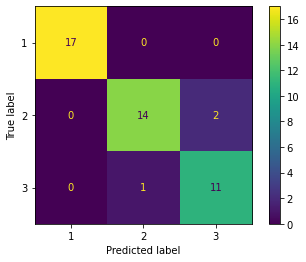

In [24]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(y_pred, y_test, classifier)

Hasil evaluasi yang didapatkan sudah sangat baik. Hasil didapatkan akurasi sebesar 93%. Eits, tapi tunggu dulu, hasil ini bisa berubah lho tergantung bagaimana konfigurasi hyperparameter (atau yang akrab disebut dengan *Hyperparameter tuning*) yang Anda lakukan

### Pertanyaan A.3

Lakukan hyperparameter tuning pada MLPClassifier dengan spesifikasi sebagai berikut:  
*   Solver: SGD (Stochastic Gradient Descent) 
*   Activation Function: ReLU
*   Ealy Stopping: True
*   Learning Rate: Invscaling
*   Learning Rate Init: 1e-5

Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [25]:
# Silakan jelaskan di sini untuk menjawab pertanyaan A.3
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='sgd',
    activation="relu",
    early_stopping=True,
    learning_rate="invscaling",
    learning_rate_init=1e-5,
    
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [26]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.25653171
Validation score: 0.181818
Iteration 2, loss = 1.25652482
Validation score: 0.181818
Iteration 3, loss = 1.25652118
Validation score: 0.181818
Iteration 4, loss = 1.25651773
Validation score: 0.181818
Iteration 5, loss = 1.25651446
Validation score: 0.181818
Iteration 6, loss = 1.25651135
Validation score: 0.181818
Iteration 7, loss = 1.25650841
Validation score: 0.181818
Iteration 8, loss = 1.25650562
Validation score: 0.181818
Iteration 9, loss = 1.25650298
Validation score: 0.181818
Iteration 10, loss = 1.25650047
Validation score: 0.181818
Iteration 11, loss = 1.25649810
Validation score: 0.181818
Iteration 12, loss = 1.25649586
Validation score: 0.181818
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, solver='sgd', verbose=True)

In [27]:
print("Hasil Prediksi MLPClassifier:")
y_pred = classifier.predict(X_test)
print(y_pred)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852
Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

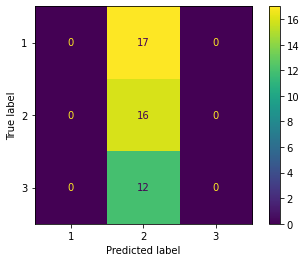

In [28]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(y_pred, y_test, classifier)

- Solver 'sgd' bekerja cukup baik pada kumpulan data yang relatif besar (dengan ribuan sampel training atau lebih), baik dari segi waktu training maupun skor validasi. Namun, untuk kumpulan data kecil, 'lbfgs' dapat mencapai konvergen lebih cepat dan berkinerja lebih baik. Berdasarkan verbose juga didapati pesan "Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.". Kemungkinan lainnya adalah data terlalu sedikit untuk training dan validation hingga semua data testing diprediksi sebagai label 2.

### Pertanyaan A.4

Lakukan hal yang sama dengan pertanyaan B.1 namun dengan kondisi berikut: 
*   Solver: Adam   
  
Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [29]:
# Silakan jelaskan di sini untuk menjawab pertanyaan A.4
from sklearn.neural_network import MLPClassifier

classifier2 = MLPClassifier(
    solver='adam',
    activation="relu",
    learning_rate="invscaling",
    learning_rate_init=1e-5,
    
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [30]:
classifier2.fit(X_train, y_train)

Iteration 1, loss = 1.29852813
Iteration 2, loss = 1.29850283
Iteration 3, loss = 1.29847753
Iteration 4, loss = 1.29845222
Iteration 5, loss = 1.29842693
Iteration 6, loss = 1.29840163
Iteration 7, loss = 1.29837634
Iteration 8, loss = 1.29835105
Iteration 9, loss = 1.29832578
Iteration 10, loss = 1.29830052
Iteration 11, loss = 1.29827526
Iteration 12, loss = 1.29825001
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, verbose=True)

In [31]:
print("Hasil Prediksi MLPClassifier:")
y_pred = classifier2.predict(X_test)
print(y_pred)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852
Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

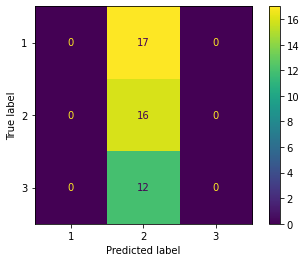

In [32]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(y_pred, y_test, classifier2)

- Solver default 'adam' bekerja cukup baik pada kumpulan data yang relatif besar (dengan ribuan sampel training atau lebih), baik dari segi waktu training maupun skor validasi. Namun, untuk kumpulan data kecil, 'lbfgs' dapat mencapai konvergen lebih cepat dan berkinerja lebih baik. Berdasarkan verbose juga didapati pesan "Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.". Kemungkinan lainnya adalah data terlalu sedikit untuk training dan validation hingga semua data testing diprediksi sebagai label 2.

### Evaluasi dengan Classifier Lain
Mari kita lihat bagaimana performa Neural Network jika dibandingkan dengan classifier lain

#### Decision Tree (Gini & Entropy)
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Decision Tree. Kali ini menggunakan variasi Gini & Entropy untuk Decision Tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
y_pred_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
y_pred_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.84      0.91        19
           3       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9166666666666666
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9473684210526315
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.9238095238095237
F1 Micro Average: 0.9333333333333333


Confusion Matrix



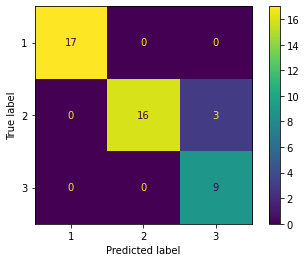

In [34]:
# Evaluasi Varian Gini
evaluate_classifier_performance(y_test, y_pred_dt_gini, classifier_dt_gini)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.88      0.82      0.85        17
           3       0.75      0.82      0.78        11

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45


Accuracy: 0.8888888888888888
Precision Macro Average: 0.875
Precision Micro Average: 0.8888888888888888
Recall Macro Average: 0.8805704099821746
Recall Micro Average: 0.8888888888888888
F1 Macro Average: 0.8770311813790075
F1 Micro Average: 0.8888888888888888


Confusion Matrix



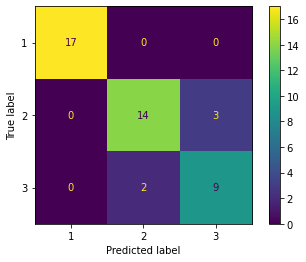

In [35]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(y_test, y_pred_dt_entropy, classifier_dt_entropy)

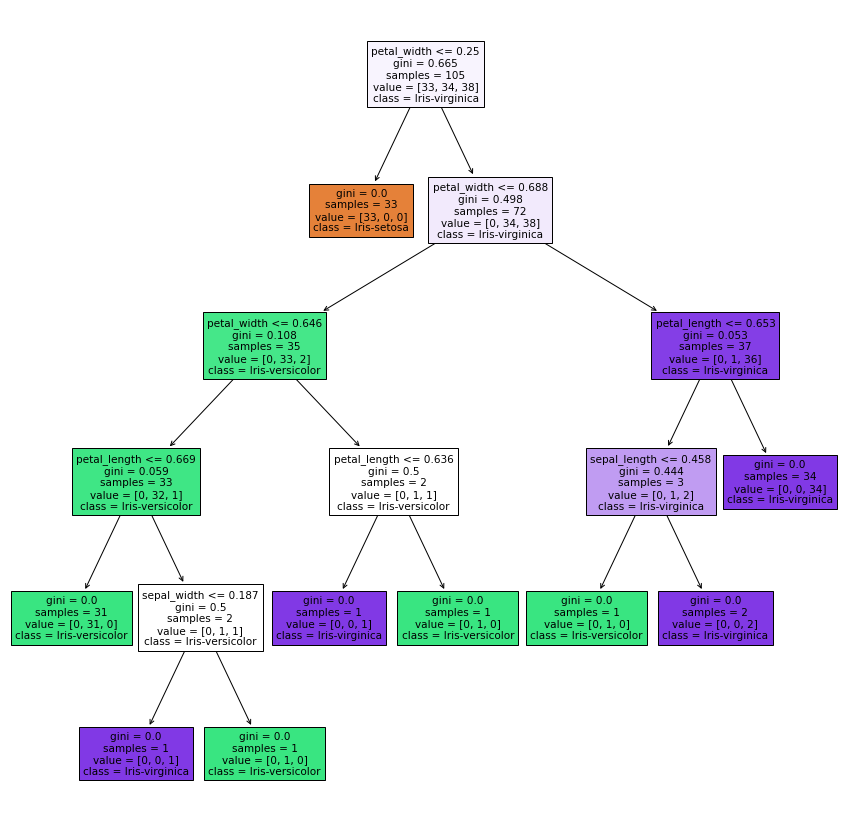

In [36]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_gini, feature_names = fn, class_names = cn, filled = True);

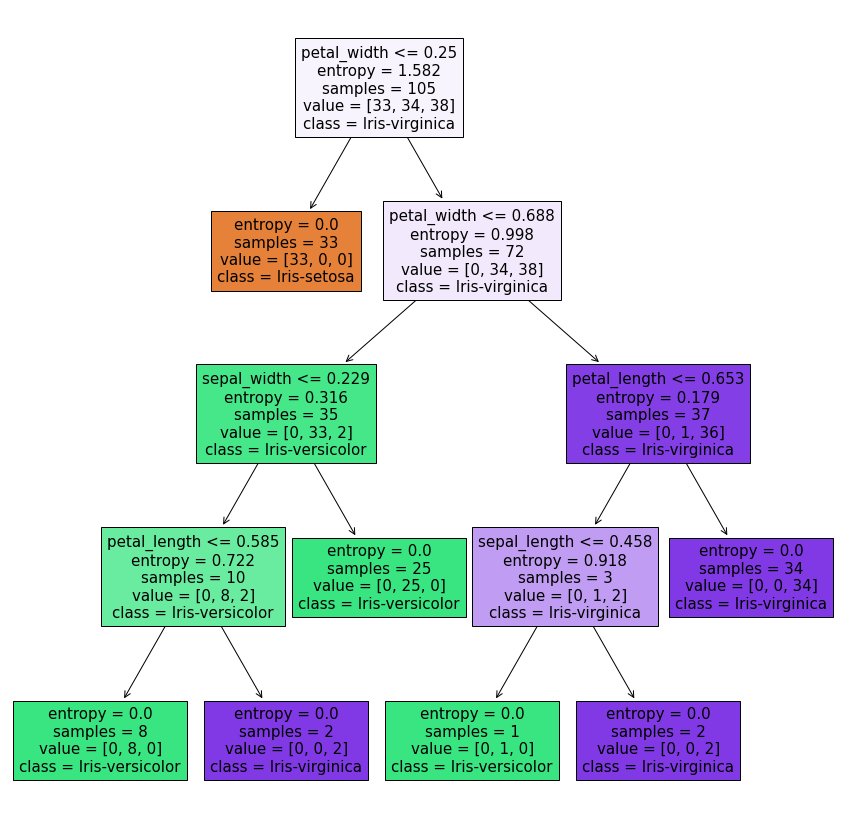

In [37]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_entropy, feature_names = fn, class_names = cn, filled = True);

#### KNN
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.94      0.97        17
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 0.9777777777777777
Precision Macro Average: 0.9722222222222222
Precision Micro Average: 0.9777777777777777
Recall Macro Average: 0.9803921568627452
Recall Micro Average: 0.9777777777777777
F1 Macro Average: 0.9754062362758015
F1 Micro Average: 0.9777777777777777


Confusion Matrix



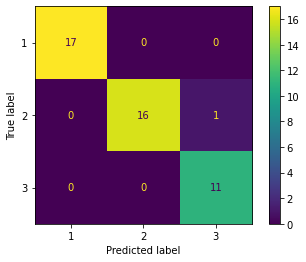

In [39]:
evaluate_classifier_performance(y_test, knn_pred, knn)

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.89      0.94        18
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9444444444444445
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9629629629629629
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



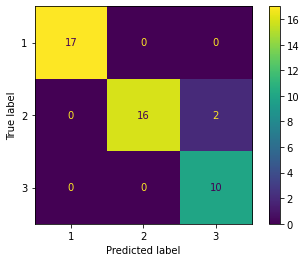

In [41]:
evaluate_classifier_performance(y_test, bayes_pred, bayes)

#### SVM
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan SVM

In [42]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.89      0.94        18
           3       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9444444444444445
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9629629629629629
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



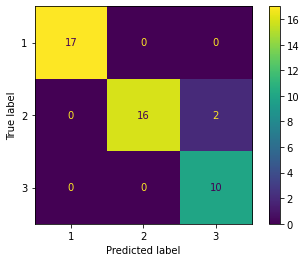

In [43]:
evaluate_classifier_performance(y_test, svm_pred, svm)

# Pertanyaan Bagian B

Pertanyaan A adalah pertanyaan yang disematkan di tengah - tengah tutorial. Pertanyaan B adalah pertanyaan diluar tutorial. Pada bagian ini Anda diharuskan menerepkan membuat model Neural Network untuk kasus klasifikasi

### Penjelasan Dataset

Dataset yang digunakan adalah dataset Perubahan berat badan, kalori, dan pola olahraga pada tahun 2018

Penjelesan atribut:
*   **date** : Date of observations.
*   **stone, pounds, ounces** : measured weight
*   **weight_oz** : Total weight in ounces
*   **calories** : Approximate calories consumed on that date
*   **calsperoz** : calories per ounce - calories for that day divided by weight in ounces
*   **five_donuts** : day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE
*   **walk** : day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE
*   **run**: day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE
*   **wine** : day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE
*   **prot** : day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE
*   **weight** : signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE
*   **change** : change in weight in oz

# Pertanyaan B.1
Menggunakan dataset yang diberikan (**diet_data.csv**) Silakan lakukan pemodelan klasifikasi menggunakan **MLPClassifier** untuk memprediksi kolom **change**.  
  
Dikarenakan kolom change masih berupa numerik, silakan ubah terlebih dahulu mengikuti ketentuan berikut:  
*   Jika change bernilai negatif (Misal -30.0), maka ubah menjadi angka **2**
*   Jika change bernilai positif (Misal 8.0), maka ubah menjadi angka **1**
*   Jika change bernilai nol (0.0), maka ubah menjadi angka **0**
*   Train : Test data memiliki perbandingan 70 : 30
*   Random state: 2021

Jawaban harus meliputi:  
1.   EDA (Exploratory Data Analysis)
2.   Data Preprocessing
3.   Pembentukan classifier dengan MLPClassifier
4.   Evaluasi menggunakan MLPClassifier (minimal mencakup Akurasi, Precision, Recall, dan F1)
5.   Evaluasi dan perbandingan menggunakan classifier lain (Minimal 3 classifier)




## EDA & Preprocessing

In [44]:
# Implementasi Pertanyaan B.1
dataset = pd.read_csv("diet_data.csv")
dataset.head()

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         150 non-null    object 
 1   stone        142 non-null    float64
 2   pounds       142 non-null    float64
 3   ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


In [46]:
dataset.describe()

,stone,pounds,ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,142.000000,142.000000,142.000000,149.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,147.000000
mean,11.535211,6.218310,3.577465,2560.724832,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-19.088435
std,0.500524,5.655746,2.915656,571.190848,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,215.557796
min,11.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2598.000000
25%,11.000000,1.000000,0.000000,2662.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.500000,4.000000,2688.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,14.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


array([[<AxesSubplot:title={'center':'stone'}>,
        <AxesSubplot:title={'center':'pounds'}>,
        <AxesSubplot:title={'center':'ounces'}>],
       [<AxesSubplot:title={'center':'weight_oz'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'five_donuts'}>],
       [<AxesSubplot:title={'center':'walk'}>,
        <AxesSubplot:title={'center':'run'}>,
        <AxesSubplot:title={'center':'wine'}>],
       [<AxesSubplot:title={'center':'prot'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'change'}>]], dtype=object)

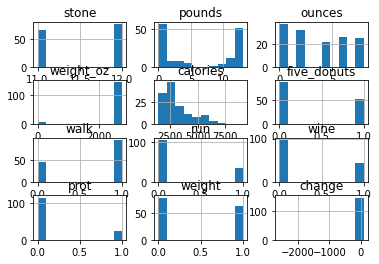

In [47]:
dataset.hist()

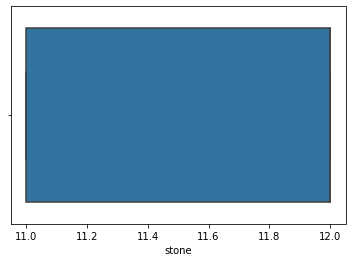

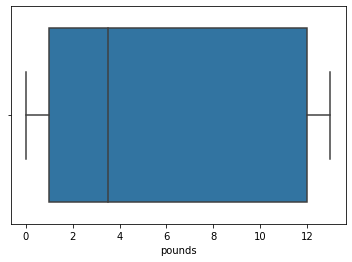

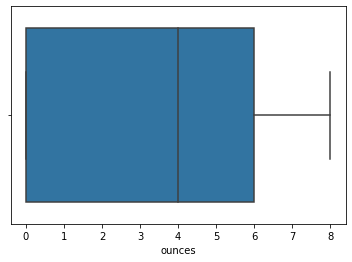

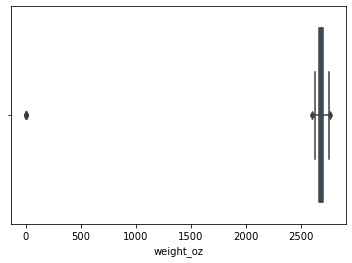

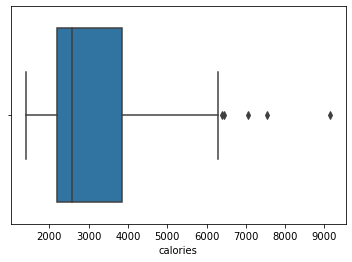

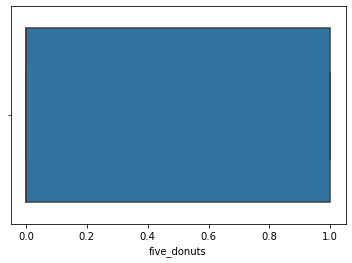

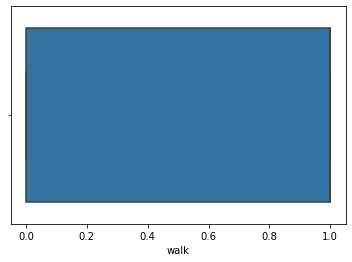

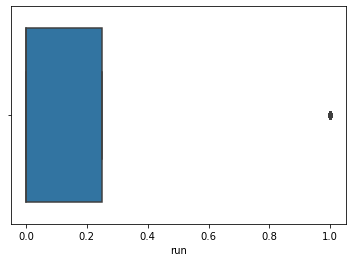

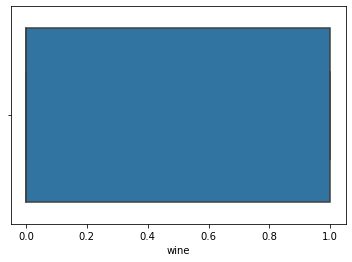

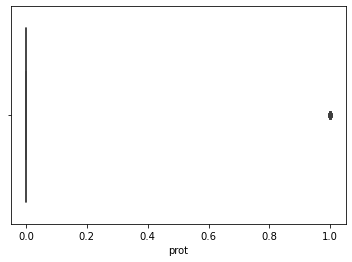

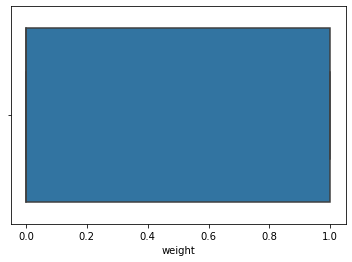

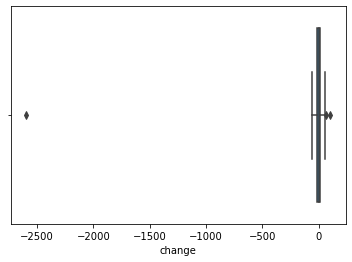

In [48]:
for column in dataset.select_dtypes("number"):
    plt.figure()
    sns.boxplot(x=dataset[column])

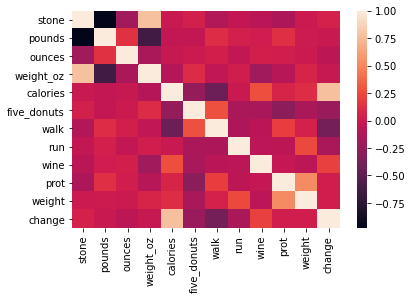

In [49]:
# Visualisasi Menggunakan Heatmap
sns.heatmap(dataset.corr());

<AxesSubplot:xlabel='calories', ylabel='change'>

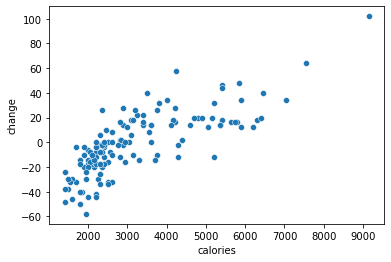

In [50]:
sns.scatterplot(x="calories", y="change", data=dataset)

<AxesSubplot:xlabel='walk', ylabel='change'>

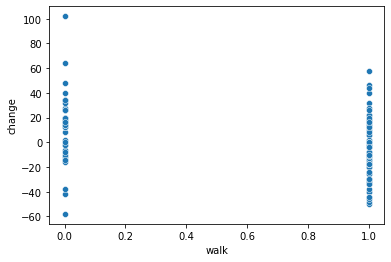

In [51]:
sns.scatterplot(x="walk", y="change", data=dataset)

In [52]:
dataset.change = dataset.change.map(lambda x: 2 if x < 0 else 1 if x > 0 else 0)
dataset.head()

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,2
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,1
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,2
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,1


In [53]:
dataset.groupby('change').size()

change
0    17
1    56
2    78
dtype: int64

In [54]:
# Replace data error
dataset.replace({
    "#DIV/0!": np.nan,
}, inplace=True)

In [55]:
dataset.cals_per_oz = dataset.cals_per_oz.astype("float")

Mengganti NaN dengan mean

In [56]:
from sklearn.impute import SimpleImputer

In [57]:

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(dataset.drop([ "date"], axis=1))

X = pd.DataFrame(X, columns=dataset.drop(["date"], axis=1).columns) 


Perlakuan khusus untuk date

In [58]:
dataset.date.tail()

146    12/23/2018
147    12/24/2018
148    12/25/2018
149    12/26/2018
150           NaN
Name: date, dtype: object

In [59]:
# Replace date null dengan hari setelahnya 
X["date"] = pd.to_datetime(dataset.date) 
X["date"].fillna(pd.to_datetime("12/27/2018"), inplace=True)

In [60]:
X["date_month"] = X["date"].dt.month
X["date_week"] = X["date"].dt.week
X["date_day"] = X["date"].dt.day
X["date_dayofweek"] = X["date"].dt.dayofweek

<ipython-input-60-9b3405e29520>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  X["date_week"] = X["date"].dt.week


In [61]:
X.drop("date", axis=1, inplace=True)

In [62]:
# plt.plot(X['date'], X['change'])
# plt.xticks(rotation='vertical')

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stone           151 non-null    float64
 1   pounds          151 non-null    float64
 2   ounces          151 non-null    float64
 3   weight_oz       151 non-null    float64
 4   calories        151 non-null    float64
 5   cals_per_oz     151 non-null    float64
 6   five_donuts     151 non-null    float64
 7   walk            151 non-null    float64
 8   run             151 non-null    float64
 9   wine            151 non-null    float64
 10  prot            151 non-null    float64
 11  weight          151 non-null    float64
 12  change          151 non-null    float64
 13  date_month      151 non-null    int64  
 14  date_week       151 non-null    int64  
 15  date_day        151 non-null    int64  
 16  date_dayofweek  151 non-null    int64  
dtypes: float64(13), int64(4)
memory usa

In [64]:
X_final = X.drop(columns="change", axis=1)
y_final = X["change"]


X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state=2021)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train) 
X_test = sc.transform(X_test)

In [66]:
X_final = X.drop(columns="change", axis=1)
y_final = X["change"]


X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state=2021)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train) 
X_test = sc.transform(X_test)

## Modelling

In [68]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [69]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.43      0.75      0.55         4
         1.0       0.88      0.88      0.88        16
         2.0       0.91      0.81      0.86        26

    accuracy                           0.83        46
   macro avg       0.74      0.81      0.76        46
weighted avg       0.86      0.83      0.84        46


Accuracy: 0.8260869565217391
Precision Macro Average: 0.738871635610766
Precision Micro Average: 0.8260869565217391
Recall Macro Average: 0.8108974358974358
Recall Micro Average: 0.8260869565217391
F1 Macro Average: 0.7591991341991342
F1 Micro Average: 0.8260869565217391


Confusion Matrix



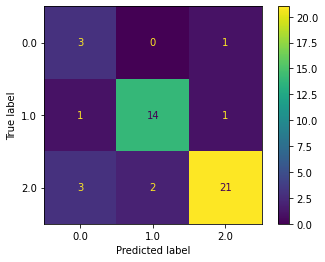

In [70]:
evaluate_classifier_performance(y_pred, y_test, classifier)

## Compare with others

#### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
y_pred_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
y_pred_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.88      0.78      0.82        18
         2.0       0.77      0.87      0.82        23

    accuracy                           0.80        46
   macro avg       0.80      0.75      0.77        46
weighted avg       0.81      0.80      0.80        46


Accuracy: 0.8043478260869565
Precision Macro Average: 0.798076923076923
Precision Micro Average: 0.8043478260869565
Recall Macro Average: 0.7491143317230273
Recall Micro Average: 0.8043478260869565
F1 Macro Average: 0.7688408696812058
F1 Micro Average: 0.8043478260869565


Confusion Matrix



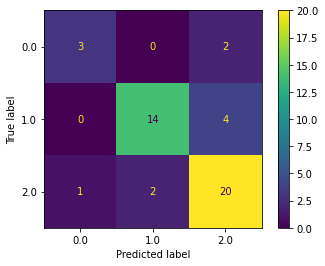

In [72]:
# Evaluasi Varian Gini
evaluate_classifier_performance(y_test, y_pred_dt_gini, classifier_dt_gini)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.81      0.81      0.81        16
         2.0       0.81      0.84      0.82        25

    accuracy                           0.80        46
   macro avg       0.79      0.75      0.77        46
weighted avg       0.80      0.80      0.80        46


Accuracy: 0.8043478260869565
Precision Macro Average: 0.7900641025641025
Precision Micro Average: 0.8043478260869565
Recall Macro Average: 0.7508333333333334
Recall Micro Average: 0.8043478260869565
F1 Macro Average: 0.7675653594771242
F1 Micro Average: 0.8043478260869565


Confusion Matrix



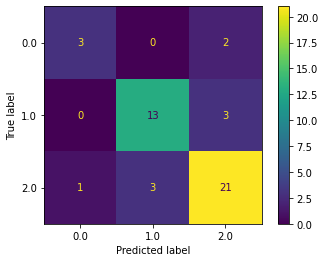

In [73]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(y_test, y_pred_dt_entropy, classifier_dt_entropy)

#### KNN
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55         7
         1.0       0.56      0.82      0.67        11
         2.0       0.81      0.75      0.78        28

    accuracy                           0.72        46
   macro avg       0.71      0.67      0.66        46
weighted avg       0.74      0.72      0.72        46


Accuracy: 0.717391304347826
Precision Macro Average: 0.7067307692307692
Precision Micro Average: 0.717391304347826
Recall Macro Average: 0.6655844155844156
Recall Micro Average: 0.717391304347826
F1 Macro Average: 0.6632996632996633
F1 Micro Average: 0.717391304347826


Confusion Matrix



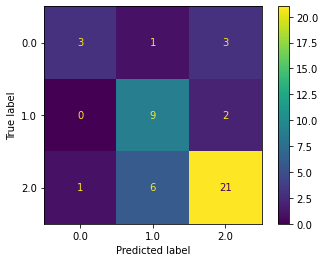

In [75]:
evaluate_classifier_performance(y_test, knn_pred, knn)

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       0.62      0.71      0.67        14
         2.0       0.85      0.76      0.80        29

    accuracy                           0.76        46
   macro avg       0.74      0.82      0.77        46
weighted avg       0.77      0.76      0.76        46


Accuracy: 0.7608695652173914
Precision Macro Average: 0.7403846153846154
Precision Micro Average: 0.7608695652173914
Recall Macro Average: 0.8243021346469623
Recall Micro Average: 0.7608695652173914
F1 Macro Average: 0.7746031746031745
F1 Micro Average: 0.7608695652173914


Confusion Matrix



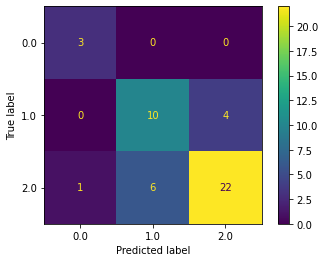

In [77]:
evaluate_classifier_performance(y_test, bayes_pred, bayes)

#### SVM
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan SVM

In [78]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       0.56      0.69      0.62        13
         2.0       0.88      0.74      0.81        31

    accuracy                           0.74        46
   macro avg       0.65      0.81      0.70        46
weighted avg       0.78      0.74      0.75        46


Accuracy: 0.7391304347826086
Precision Macro Average: 0.6490384615384616
Precision Micro Average: 0.7391304347826086
Recall Macro Average: 0.8114143920595533
Recall Micro Average: 0.7391304347826086
F1 Macro Average: 0.6981246218995766
F1 Micro Average: 0.7391304347826085


Confusion Matrix



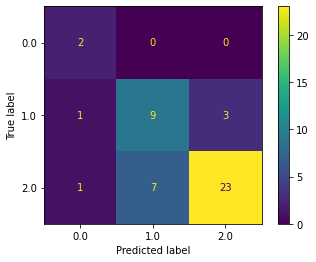

In [79]:
evaluate_classifier_performance(y_test, svm_pred, svm)

# Pertanyaan B.2
1. Pada rumus untuk melakukan update terhadap weight/bobot, apabila nilai variabel o lebih besar daripada t, apakah nilai weight setelah di-update lebih besar daripada nilai sebelum di-update? Jelaskan alasannya.
2. Dari jawaban yang Anda dapatkan dari B.1, apakah MLP lebih baik daripada classifier lain yang Anda gunakan? Mengapa hal tersebut bisa terjadi? Apa kesimpulan Anda ?

 # Jawaban Pertanyaan B.2
 1. Apabila nilai o lebih besar dari t, maka nilai weight akan diupdate menjadi lebih kecil. Begitu juga sebaliknya, apabila nilai t lebih besar daripada o, maka nilai w akan diupdate menjadi lebih besar. Alasannya adalah nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin. Apabila o lebih besar, maka perlu dilakukan update sehingga o mendekati atau sama dengan nilai t dengan mengurangi nilai weight.

 2. Melalui MLPClassifier didapatkan skor setiap metric yang paling tinggi, sedikit lebih tinggi di antara yang lain di mana didapatkan rata-rata skor sekitar 80%. Decision Tree juga menghasilkan skor sekitar 80% untuk setiap metric dengan akurasi dan recall macro yang kurang dari MLP. KNN, naive Bayes dan SVM, menghasilkan skor rata-rata sekitar 70% untuk setiap metric. Alasan yang paling mungkin adalah terdapat proses iterasi yang berulang-ulang untuk pengklasifikasian pada Neural network, dimana tiap iterasi akan dilakukan pembaruan setiap weight dan bias pada tiap neuron secara terus-menerus hingga didapatkan nilai performa terbaik. Dengan demikian, MLPClassifier mampu menghasilkan tingkat performa paling optimal dibanding algoritma lainnya yang saya bandingkan pada kasus ini.